In [1]:
import os
from openslide import OpenSlide
import matplotlib.pyplot as plt

import os
import sys
import glob
import random
import pickle
import numpy as np
import pandas as pd
from PIL import Image
from skimage import color
from skimage import filters
from skimage.morphology import disk
from openslide import OpenSlide, OpenSlideUnsupportedFormatError

import histolab
from histolab.slide import Slide
from histolab.types import CoordinatePair
from histolab.masks import BinaryMask

from skimage.color import rgb2hsv
from skimage.filters import threshold_otsu

from histolab.tiler import GridTiler

In [7]:
level = 8 #changes the shape dimensions of the binarymask, makes more sense to do masking on a higher level 
RGB_min = 10 #the smaller the more intensified the yellow map is (bigger mask (more 1s))

class MaskwithSegmentTissue(BinaryMask):
    def _mask(self, slide):  # pragma: no cover
        # This property will be supplied by the inheriting classes individually
        extractedtile = slide.extract_tile(coords = CoordinatePair(0,0,0,0), level = level, tile_size = slide.level_dimensions(level))
        extractedtile= extractedtile.image.convert('RGB')

        # note the shape of img_RGB is the transpose of slide.level_dimensions
#         img_RGB = np.transpose(np.array(extractedtile),
#                        axes=[1, 0, 2])
        img_RGB = np.array(extractedtile)


        img_HSV = rgb2hsv(img_RGB)

        background_R = img_RGB[:, :, 0] > threshold_otsu(img_RGB[:, :, 0])
        background_G = img_RGB[:, :, 1] > threshold_otsu(img_RGB[:, :, 1])
        background_B = img_RGB[:, :, 2] > threshold_otsu(img_RGB[:, :, 2])
        tissue_RGB = np.logical_not(background_R & background_G & background_B)
        tissue_S = img_HSV[:, :, 1] > threshold_otsu(img_HSV[:, :, 1])
        min_R = img_RGB[:, :, 0] > RGB_min
        min_G = img_RGB[:, :, 1] > RGB_min
        min_B = img_RGB[:, :, 2] > RGB_min

        tissue_mask = tissue_S & tissue_RGB & min_R & min_G & min_B

        return tissue_mask 
    

In [3]:
image_path = '/Users/imac/Documents/Documents_Pieter_MacBook_Pro/0MasterAI/THESIS/data/CAMELYON/normal_001.tif'
processed_path = '/Users/imac/Documents/Documents_Pieter_MacBook_Pro/0MasterAI/THESIS/data/CAMELYON/processedimage'
firstslide = Slide(image_path,processed_path) #input and output path 

binary_mask = MaskwithSegmentTissue()
binary_mask(firstslide)
# plt.imshow(binary_mask(firstslide))




array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [1]:
firstslide.scaled_image()

NameError: name 'firstslide' is not defined

In [30]:
binary_mask = MaskwithSegmentTissue()
binary_mask(firstslide).shape #height, width 

(3456, 1528)

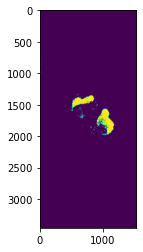

In [31]:
binary_mask = MaskwithSegmentTissue()
plt.imshow(binary_mask(firstslide))

In [32]:
firstslide.level_dimensions(6) #Return the slide dimensions (w,h)

(1528, 3456)

In [2]:
firstslide.locate_mask(binary_mask= MaskwithSegmentTissue())

NameError: name 'firstslide' is not defined

In [3]:
# level should vary between 0,1 and 2
gridtiler = GridTiler(tile_size = (224,224), level=4, tissue_percent=0.75)
gridtiler.locate_tiles(slide = firstslide, extraction_mask = MaskwithSegmentTissue(), scale_factor=32, alpha = 128 )

NameError: name 'GridTiler' is not defined

In [4]:
# level should vary between 0,1 and 2
gridtiler = GridTiler(tile_size = (224,224), level=0, tissue_percent=0.75)
gridtiler.locate_tiles(slide = firstslide, extraction_mask = MaskwithSegmentTissue(), scale_factor=32, alpha = 128 )

NameError: name 'GridTiler' is not defined

In [95]:
image_path = '/Users/imac/Documents/Documents_Pieter_MacBook_Pro/0MasterAI/THESIS/data/CAMELYON/normal_001.tif'
processed_path = '/Users/imac/Documents/tryout'
firstslide = Slide(image_path,processed_path)

#note: maskwithsegmenttissue has a level, and gritiler has a level

gridtiler = GridTiler(tile_size = (224,224), level = 4, tissue_percent=0.75)
gridtiler.extract(slide = firstslide, extraction_mask = MaskwithSegmentTissue())


In [113]:
# training set
folder = '/Users/imac/Documents/Documents_Pieter_MacBook_Pro/0MasterAI/THESIS/data/CAMELYON'

#first a loop for normal 
index = 1
for idx, image in enumerate(os.listdir(folder)):
    if image[:6] == 'normal':
        print(image[:6])
        image_path = os.path.join(folder, image)
        processed_path = os.path.join('/Users/imac/Documents/tryoutcamelyon/training_data/normal', str(index))
        slide = Slide(image_path, processed_path)
        gridtiler = GridTiler(tile_size = (224,224), level = 4, tissue_percent=0.75)
        gridtiler.extract(slide = slide, extraction_mask = MaskwithSegmentTissue())
        index += 1
        

    

#then a loop for tumor 



normal
normal
normal
